# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [84]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [87]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [89]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [91]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [94]:
# Splits the housing data into a training set (80%) and a testing set (20%).
import pandas as pd
from sklearn.model_selection import train_test_split

# Defines the column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loads the dataset
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Split the data into features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Splits the data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (404, 14)
Testing data shape: (102, 14)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [101]:
# Trains a linear regression model on the housing dataset and generates predictions on both the training and the testing set.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defines the column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loads the dataset
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Splits the data into features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Splits the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes and trains the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generates predictions on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates the mean squared error for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Outputs the MSE values
print("Training Set MSE:", train_mse)
print("Testing Set MSE:", test_mse)


Training Set MSE: 21.641412753226316
Testing Set MSE: 24.291119474974067


## 3. Calculate and print R-squared for both the training and the testing set.

In [103]:
# Calculates the R-squared for both training and testing sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

# Outputs the results
print("Training Set R-squared:", train_r2)
print("Testing Set R-squared:", test_r2)

Training Set R-squared: 0.7508856358979672
Testing Set R-squared: 0.6687594935356245


## 4. Calculate and print mean squared error for both the training and the testing set.

In [106]:
# Calculates the mean squared error for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Outputs the results
print("Training Set MSE:", train_mse)
print("Testing Set MSE:", test_mse)

Training Set MSE: 21.641412753226316
Testing Set MSE: 24.291119474974067


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [108]:
# Calculates and prints the mean absolute error for both the training and testing sets.
from sklearn.metrics import mean_absolute_error

# Calculates the mean absolute error for both training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Outputs the mean absolute error (MAE) values
print("Training Set MAE:", train_mae)
print("Testing Set MAE:", test_mae)

Training Set MAE: 3.3147716267832337
Testing Set MAE: 3.1890919658879158


## Classification Model Evaluation

In [111]:
from sklearn.datasets import load_iris
data = load_iris()

In [113]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [115]:
column_names = data.feature_names

In [117]:
df = pd.DataFrame(data['data'],columns=column_names)

In [119]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [121]:
target = pd.DataFrame(data.target)

In [123]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [125]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [133]:
# Splits the dataset into training (80%) and testing (20%) sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loads the iris dataset
iris = load_iris()

# Converts the dataset to a pandas dataframe
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data['class'] = iris.target  # Adds the target column

# Splits the data into features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Splits the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (404, 14)
Testing data shape: (102, 14)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [137]:
# Trains a Logistic Regression model on this data set and generates predictions on both the training and testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loads the iris dataset
iris = load_iris()

# Converts the dataset to a pandas dataframe
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data['class'] = iris.target  # Adds the target column

# Splits the data into features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Splits the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Initializes and trains the logistic regression model
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# Generates predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [142]:
# Calculates and prints the accuracy score for both the training and testing sets.

from sklearn.metrics import balanced_accuracy_score

# Calculates the accuracy for both the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Outputs the results
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.975
Testing Set Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [146]:
from sklearn.metrics import balanced_accuracy_score

# Converts the predictions to class labels if needed
y_train_pred_labels = model.predict(X_train)
y_test_pred_labels = model.predict(X_test)

# Calculates the balanced accuracy for both training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred_labels)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred_labels)

# Outputs the balanced accuracy scores
print("Training Set Balanced Accuracy:", train_balanced_accuracy)
print("Testing Set Balanced Accuracy:", test_balanced_accuracy)

Training Set Balanced Accuracy: 0.975609756097561
Testing Set Balanced Accuracy: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [148]:
# Calculates and prints the precision score for the training and testing sets.
from sklearn.metrics import precision_score

# Convert predictions to class labels if needed
y_train_pred_labels = model.predict(X_train)
y_test_pred_labels = model.predict(X_test)

# Calculate precision score for both training and testing sets
train_precision = precision_score(y_train, y_train_pred_labels, average='weighted')
test_precision = precision_score(y_test, y_test_pred_labels, average='weighted')

# Output the precision scores
print("Training Set Precision Score:", train_precision)
print("Testing Set Precision Score:", test_precision)

Training Set Precision Score: 0.9767857142857144
Testing Set Precision Score: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [150]:
# Calculates and prints the recall score for both the training and testing sets.
from sklearn.metrics import recall_score

# Calculate recall score for both training and testing sets
train_recall = recall_score(y_train, y_train_pred_labels, average='weighted')
test_recall = recall_score(y_test, y_test_pred_labels, average='weighted')

# Output the recall scores
print("Training Set Recall Score:", train_recall)
print("Testing Set Recall Score:", test_recall)

Training Set Recall Score: 0.975
Testing Set Recall Score: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [153]:
# Calculates and prints the F1 score for the training and testing sets
from sklearn.metrics import f1_score

# Calculates the F1 score for both training and testing sets
train_f1 = f1_score(y_train, y_train_pred_labels, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_labels, average='weighted')

# Outputs the F1 scores
print("Training Set F1 Score:", train_f1)
print("Testing Set F1 Score:", test_f1)

Training Set F1 Score: 0.9749882794186592
Testing Set F1 Score: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

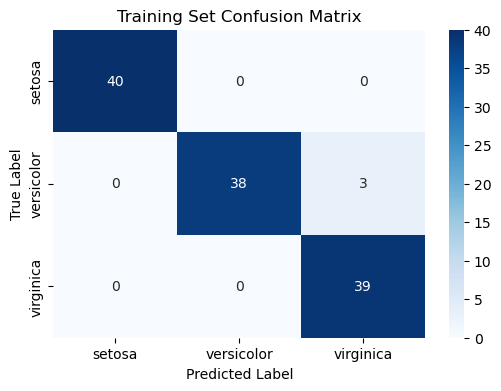

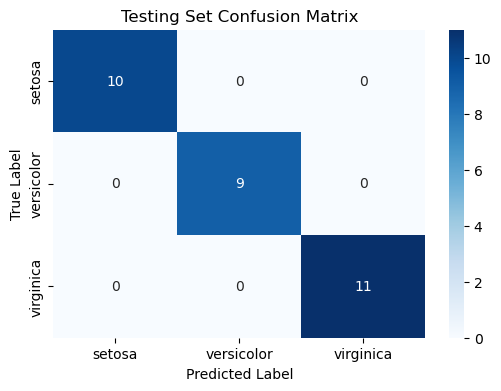

In [158]:
# Generates confusion matrices for both the training and testing sets.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrices for training and testing sets
confusion_matrix_train = confusion_matrix(y_train, y_train_pred_labels)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot the confusion matrices
plot_confusion_matrix(confusion_matrix_train, "Training Set Confusion Matrix")
plot_confusion_matrix(confusion_matrix_test, "Testing Set Confusion Matrix")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [190]:
# Additional models - housing dataset
# Trains the housing dataset with multiple models, calculates the evaluation metrics and compares them to determine which models
# perform best on the dataset.
# It is worth noting that a categorical target will be created so that the logistic regression, decision tree, random forest, and 
# support vector machine (SVM) can be executed.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# Loads the housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Separate features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Create a categorical target for classification models
y_class = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])  # Split MEDV into 3 categories

# Split the data into training and testing sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

# Evaluate regression model
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }
    return metrics

# Evaluate classification model
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='weighted'),
        "Test Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Train Recall": recall_score(y_train, y_train_pred, average='weighted'),
        "Test Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted')
    }
    return metrics

# Evaluates all the models and stores their results
results = {}
results["Linear Regression"] = evaluate_regression(models["Linear Regression"], X_train, X_test, y_train_reg, y_test_reg)

for model_name in ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]:
    results[model_name] = evaluate_classification(models[model_name], X_train_class, X_test_class, y_train_class, y_test_class)

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Displays the comparison table
print("Model Comparison Results:")
print(results_df)

'''
Based on the results obtained:
- the worst performing model was SVM. Test accuracy of 0.5098 and test F1 score = 0.4260
- linear regression is ok, but not necessarily great. R2 on the training set was 0.7509 and for the testing set 0.6688.
- decision tree was a bit better than logistic regression, but the perfect training scores may signal overfitting.

-for continuous housing prices, linear regression would be best; has reasonable r2 and mse scores.
-for classified/categorized housing prices, random forest had the highest test accuracy (75.5%) and test F1 score (0.7581).
'''

Model Comparison Results:
                        Train MSE   Test MSE  Train R2   Test R2  \
Linear Regression       21.641413  24.291119  0.750886  0.668759   
Logistic Regression           NaN        NaN       NaN       NaN   
Decision Tree                 NaN        NaN       NaN       NaN   
Random Forest                 NaN        NaN       NaN       NaN   
Support Vector Machine        NaN        NaN       NaN       NaN   

                        Train Accuracy  Test Accuracy  Train Precision  \
Linear Regression                  NaN            NaN              NaN   
Logistic Regression           0.759901       0.705882         0.759433   
Decision Tree                 1.000000       0.715686         1.000000   
Random Forest                 1.000000       0.754902         1.000000   
Support Vector Machine        0.551980       0.509804         0.535463   

                        Test Precision  Train Recall  Test Recall  \
Linear Regression                  NaN           Na

'\nBased on the results obtained:\n- the worst performing model was SVM. Test accuracy of 0.5098 and test F1 score = 0.4260\n- linear regression is ok, but not necessarily great. R2 on the training set was 0.7509 and for the testing set 0.6688.\n- decision tree was a bit better than logistic regression, but the perfect training scores may signal overfitting.\n\n-for continuous housing prices, linear regression would be best; has reasonable r2 and mse scores.\n-for classified/categorized housing prices, random forest had the highest test accuracy (75.5%) and test F1 score (0.7581).\n'

In [194]:
# Additional models - Iris dataset
# Trains the iris dataset with multiple models, calculates the evaluation metrics and compares them to determine which models
# perform best on the dataset.

# Imports and/or re-imports necessary modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# loads the dataset. are the independent variables and y is the target.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  
y = pd.Series(iris.target)  

# Makes sure the target variable is in integer format
y = y.astype(int)

# splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the  models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

# Creates a function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "Accuracy (Train)": accuracy_score(y_train, y_train_pred),
        "Accuracy (Test)": accuracy_score(y_test, y_test_pred),
        "Precision (Train)": precision_score(y_train, y_train_pred, average='weighted'),
        "Precision (Test)": precision_score(y_test, y_test_pred, average='weighted'),
        "Recall (Train)": recall_score(y_train, y_train_pred, average='weighted'),
        "Recall (Test)": recall_score(y_test, y_test_pred, average='weighted'),
        "F1 Score (Train)": f1_score(y_train, y_train_pred, average='weighted'),
        "F1 Score (Test)": f1_score(y_test, y_test_pred, average='weighted')
    }
    return metrics

# Evaluates all models and stores their results
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converts results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T

# Displays the comparison table
print("Model Comparison Results:")
print(results_df)

'''
Based on the results obtained from this code, all models achieved perfect testing metrics. Logistic regression
and SVC may be preferable because they achieve the same testing performance while keeping slightly lower training metrics.
Decision tree and random forest achieved all metrics perfectly (1.0), which could possibly be because of overfitting.
I personally would prefer logistic regression due to its straightforward implementation and coefficients.
'''


Model Comparison Results:
                        Accuracy (Train)  Accuracy (Test)  Precision (Train)  \
Logistic Regression                0.975              1.0           0.976786   
Decision Tree                      1.000              1.0           1.000000   
Random Forest                      1.000              1.0           1.000000   
Support Vector Machine             0.975              1.0           0.975208   

                        Precision (Test)  Recall (Train)  Recall (Test)  \
Logistic Regression                  1.0           0.975            1.0   
Decision Tree                        1.0           1.000            1.0   
Random Forest                        1.0           1.000            1.0   
Support Vector Machine               1.0           0.975            1.0   

                        F1 Score (Train)  F1 Score (Test)  
Logistic Regression             0.974988              1.0  
Decision Tree                   1.000000              1.0  
Random Forest    

'\nBased on the results obtained from this code, all models achieved perfect testing metrics. Logistic regression\nand SVC may be preferable because they achieve the same testing performance while keeping slightly lower training metrics.\nDecision tree and random forest achieved all metrics perfectly (1.0), which could possibly be because of overfitting.\nI personally would prefer logistic regression due to its straightforward implementation and coefficients.\n'